# Create a regression model to predict sale price from given attributes.
## Note that some data preparation techniques, feature selection,  and feature engineering must be applied beforehand.
### The target column is price_usd.

In [3]:
import pandas as pd
df = pd.read_csv("used_car_price.csv")

C:\Users\woosh\AppData\Local\Temp\ipykernel_23356\1729091905.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data preparation

In [69]:
df.head()

,make,model,price_usd,year,kilometer,fuel_type,transmission,color,owner,seller_type,engine,max_power,max_torque,drivetrain,length_mm,width_mm,height_mm,seating_capacity,fuel_tank_capacity_l
0,Honda,Amaze 1.2 VX i-VTEC,6060,2017,87150,Petrol,Manual,Grey,First,Corporate,1198,87,109,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,5400,2014,75000,Diesel,Manual,White,Second,Individual,1248,74,190,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,2640,2011,67000,Petrol,Manual,Maroon,First,Individual,1197,79,112,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,9588,2019,37500,Petrol,Manual,Red,First,Individual,1197,82,113,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],23400,2018,69000,Diesel,Manual,Grey,First,Individual,2393,148,343,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [5]:
print(df.info())
print(df.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  2059 non-null   object 
 1   model                 2059 non-null   object 
 2   price_usd             2059 non-null   int64  
 3   year                  2059 non-null   int64  
 4   kilometer             2059 non-null   int64  
 5   fuel_type             2059 non-null   object 
 6   transmission          2059 non-null   object 
 7   color                 2059 non-null   object 
 8   owner                 2059 non-null   object 
 9   seller_type           2059 non-null   object 
 10  engine                1979 non-null   object 
 11  max_power             1979 non-null   object 
 12  max_torque            1979 non-null   object 
 13  drivetrain            1923 non-null   object 
 14  length_mm             1995 non-null   float64
 15  width_mm             

In [35]:
# imputation = ['length_mm','width_mm','height_mm','seating_capacity','fuel_tank_capacity_l']
cols_with_float64_and_null = df[df.isnull().any(axis=1)].select_dtypes(include=['float64']).columns
df[cols_with_float64_and_null] = df[cols_with_float64_and_null].fillna(df[cols_with_float64_and_null].mean())
df = df.dropna(axis=0)

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1916 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  1916 non-null   object 
 1   model                 1916 non-null   object 
 2   price_usd             1916 non-null   int64  
 3   year                  1916 non-null   int64  
 4   kilometer             1916 non-null   int64  
 5   fuel_type             1916 non-null   object 
 6   transmission          1916 non-null   object 
 7   color                 1916 non-null   object 
 8   owner                 1916 non-null   object 
 9   seller_type           1916 non-null   object 
 10  engine                1916 non-null   object 
 11  max_power             1916 non-null   object 
 12  max_torque            1916 non-null   object 
 13  drivetrain            1916 non-null   object 
 14  length_mm             1916 non-null   float64
 15  width_mm              1916

## Feature Selection

In [53]:
df['engine'] = df['engine'].str.extract('(\d+)').astype(int)
df['max_power'] = df['max_power'].str.extract('(\d+)').astype(int)
df['max_torque'] = df['max_torque'].str.extract('(\d+)').astype(int)

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:3: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:3: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\woosh\AppData\Local\Temp\ipykernel_23356\3099502235.py:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\woosh\AppData\Local\Temp\ipykernel_23356\3099502235.py:2: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\woosh\AppData\Local\Temp\ipykernel_23356\3099502235.py:3: SyntaxWarning:

invalid escape sequence '\d'



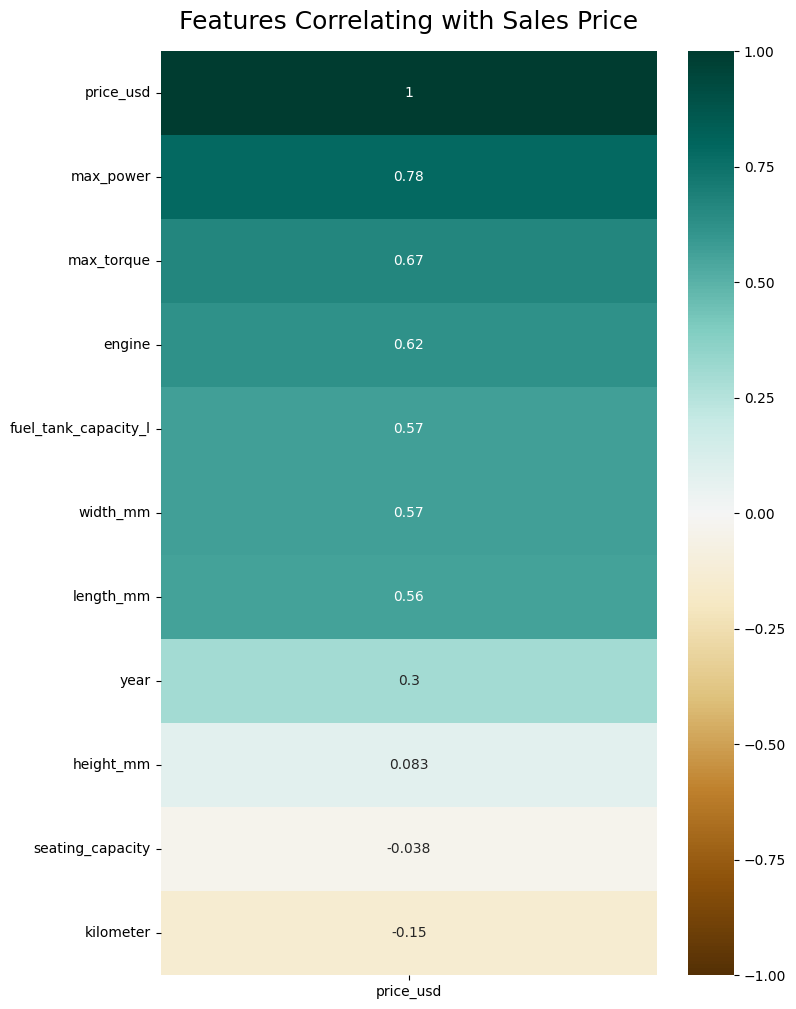

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.select_dtypes(include='number').corr()[['price_usd']].sort_values(by='price_usd', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [56]:
import plotly.express as px
fig = px.scatter(x=df.max_power, y=df.price_usd)
fig.show()

      price_usd
0          6060
1          5400
2          2640
3          9588
4         23400
...         ...
2054      10200
2055       3300
2056       2880
2057      51480
2058       8040

[1916 rows x 1 columns]
      price_usd  year  kilometer  engine  max_power  max_torque  length_mm  \
0          6060  2017      87150    1198         87         109     3990.0   
1          5400  2014      75000    1248         74         190     3995.0   
2          2640  2011      67000    1197         79         112     3585.0   
3          9588  2019      37500    1197         82         113     3995.0   
4         23400  2018      69000    2393        148         343     4735.0   
...         ...   ...        ...     ...        ...         ...        ...   
2054      10200  2016      90300    2179        138         330     4585.0   
2055       3300  2014      83000     814         55          75     3495.0   
2056       2880  2013      73000    1196         70         102     3795.0   
205